In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
pattern_types = 'double_top', 'double_bottom', 'head_and_shoulders', 'inverse_head_and_shoulders', 'reversal_rising_wedge', 'reversal_falling_wedge', 
'continuous_rising_wedge', 'continuous_falling_wedge', 'bullish_rectangle', 'bearish_rectangle', 'bullish_pennant', 'bearish_pennant'
path = Path('gdrive/MyDrive/pattern')

In [4]:
fns = get_image_files(path)
fns

(#865) [Path('gdrive/MyDrive/pattern/head_and_shoulder/3.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/일루미나.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/레킷벤키저.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/CVS 케어마크.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/Ping An Bank.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/시그나.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/JP모건 체이스.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/33.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/35.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/Wells Fargo _ Co.png')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [5]:
patterns = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128))

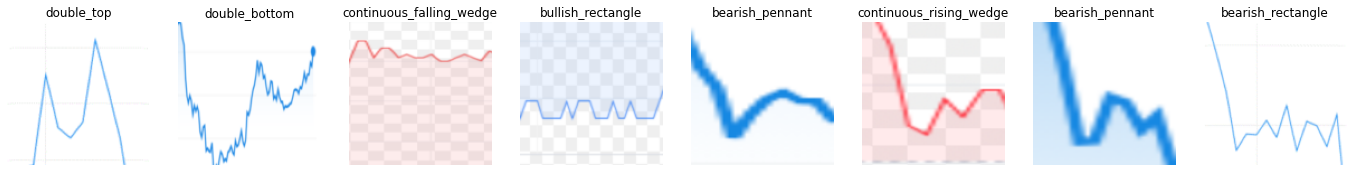

In [6]:
patterns = patterns.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = patterns.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1)

SuggestedLRs(lr_min=0.006309573352336883, lr_steep=0.00363078061491251)

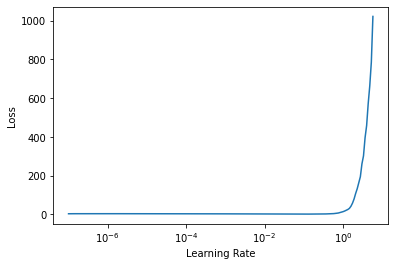

In [10]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.lr_find(stop_div=False, num_it=200, suggestions=True)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.005248074419796467)

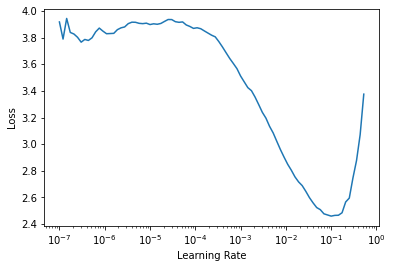

In [20]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.lr_find()

In [21]:
min_grad_lr = 0.010000000149011612
learn.fit(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.478834,3.940899,0.283237,00:03
1,1.900531,2.583347,0.502890,00:03


In [22]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,time
0,3.461115,1.829396,0.421965,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.844851,1.504060,0.560694,00:03
1,1.543408,1.205904,0.618497,00:03
2,1.223178,1.072141,0.664740,00:03
3,0.984704,0.997384,0.710983,00:03
4,0.769328,0.927759,0.728324,00:03
5,0.612725,0.898233,0.728324,00:03
6,0.493140,1.062212,0.710983,00:03
7,0.399975,1.059439,0.734104,00:03
8,0.322884,0.959245,0.734104,00:03
9,0.265884,0.906313,0.757225,00:03


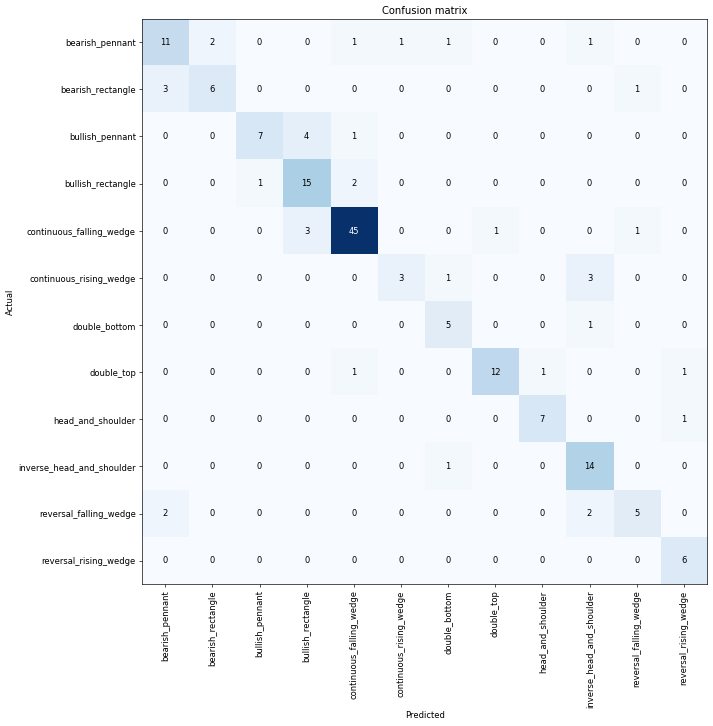

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

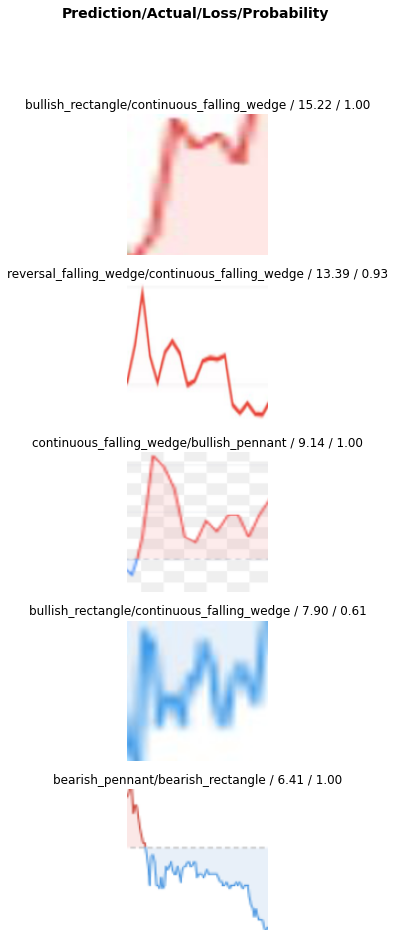

In [24]:
interp.plot_top_losses(5, nrows=5)

In [25]:
interp.most_confused(min_val=2)

[('bullish_pennant', 'bullish_rectangle', 4),
 ('bearish_rectangle', 'bearish_pennant', 3),
 ('continuous_falling_wedge', 'bullish_rectangle', 3),
 ('continuous_rising_wedge', 'inverse_head_and_shoulder', 3),
 ('bearish_pennant', 'bearish_rectangle', 2),
 ('bullish_rectangle', 'continuous_falling_wedge', 2),
 ('reversal_falling_wedge', 'bearish_pennant', 2),
 ('reversal_falling_wedge', 'inverse_head_and_shoulder', 2)]

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]